# Hackaton Ciencias de Redes
## Grupo 5
- #### Patricio Ramirez
- #### Carlos Bustamante
- #### Victor Ortiz
- #### Pablo Elgueta

## Tarea

#### Objetivo General: 
    Determinar patrones potenciales de corrupción en compras públicas en Chile. Para esto, se disponibilizarán los datos de todos las licitaciones públicas en Chile entre 2014 y 2021. Deben elegir un periodo a estudiar y que los datos son pesados.
    
#### 1) Análisis Exploratorio: 
    Puede incluir histogramas, relaciones bivariadas, correlaciones (coeficientes y figuras), etc.
#### 2) Inferencia red: 
    Red bipartita, proyección unimodal de la red bipartita, modelos nulos para filtrar (phi correlation, randomización preservando grado, etc)
#### 3) Descripción de la red: 
    Distribución de grados (antes y despues de filtrar), gráfico grado de nodo vs coeficiente de clustering, diámetro de la red, número de nodos, número de enlaces, densidad. Detección de comunidades, etc.
#### 4) Identifiación de patrones de corrupción en la red: 
    El trabajo es abierto en términos de identificación de patrones, sin embargo, pueden usar lo siguiente:
- 1) Índice de diversidad de simpson por comunidad (ver referencia 1)
- 2) índice de entropía del buyer (oferente) (ver referncia 2)
- 3) Licitaciones con solo 1 bider (ofertante) (ver referencia 1 y 2) [esto es uno de los indicadores de potencial
riesgo de corrupción, ver CRI referencia 2 y 3]
- 4) Coefcieinte de clustering competitivo (si trabajan con la red bipartita sin proyectar) (ver referencia 2)
- 5) Datos externos si encuentan y alcanzan son bienvenidos.
- 6) Otros.

### Importación de Librerías

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import networkx as nx
from networkx.algorithms import bipartite

# Desarrollo de Proyecto

## Objetivos e Hipotesis

- ¿Existe una relación que se repita de forma sostenida entre Organismos Públicos y Privados, con los Proveedores para el periodo a analizar?(2020).
- Desarrollo de una red bipartita para nuestro análisis.
- Trabajar en base al componente gigante de la red.
- Identificar patrones de corrupción en la red.

### 1) Análisis Exploratorio: 

In [2]:
df = pd.read_csv('lic2020_hackaton.csv', sep=',', encoding='latin_1')
df['FechaPublicacion']=pd.to_datetime(df['FechaPublicacion'])

In [3]:
df.head(3)

,Codigo,Tipo de Adquisicion,Estado,CodigoOrganismo,NombreOrganismo,RutUnidad,ComunaUnidad,FechaPublicacion,CodigoProductoONU,RutProveedor,NombreProveedor,Moneda de la Oferta,MontoLineaAdjudica,Oferta seleccionada
0,8468777,Licitación Pública entre a 2000 y 5000 UTM (LQ),Adjudicada,1375151,HOSPITAL CLINICO METROPOLITANO LA FLORIDA DRA ...,65.075.485-9,NaN,2020-01-21,51201806,76.432.529-K,CSL Behring SpA Chile,Peso Chileno,0,No Seleccionada
1,8468777,Licitación Pública entre a 2000 y 5000 UTM (LQ),Adjudicada,1375151,HOSPITAL CLINICO METROPOLITANO LA FLORIDA DRA ...,65.075.485-9,NaN,2020-01-21,51201806,96.945.670-2,NOVOFARMA SERVICE - LABORATORIO BAGO,Peso Chileno,0,No Seleccionada
2,8468777,Licitación Pública entre a 2000 y 5000 UTM (LQ),Adjudicada,1375151,HOSPITAL CLINICO METROPOLITANO LA FLORIDA DRA ...,65.075.485-9,NaN,2020-01-21,51201806,96.582.310-7,Grifols Chile S.A.,Peso Chileno,1592000,Seleccionada


In [3]:
df.isnull().sum()

Codigo                      0
Tipo de Adquisicion         0
Estado                      0
CodigoOrganismo             0
NombreOrganismo             0
RutUnidad                   0
ComunaUnidad           111298
FechaPublicacion            0
CodigoProductoONU           0
RutProveedor                0
NombreProveedor          1860
Moneda de la Oferta         0
MontoLineaAdjudica          0
Oferta seleccionada         0
dtype: int64

In [5]:
df[df['NombreProveedor'].isnull()].head(3)

,Codigo,Tipo de Adquisicion,Estado,CodigoOrganismo,NombreOrganismo,RutUnidad,ComunaUnidad,FechaPublicacion,CodigoProductoONU,RutProveedor,NombreProveedor,Moneda de la Oferta,MontoLineaAdjudica,Oferta seleccionada
4068,8621395,Licitación Pública Menor a 100 UTM (L1),Adjudicada,99860,MUNICIPALIDAD DE OVALLE,69.040.700-0,Ovalle,2020-01-13,25172301,76.690.208-1,NaN,Peso Chileno,1200000,Seleccionada
4190,8621461,Licitación Pública Menor a 100 UTM (L1),Adjudicada,99860,MUNICIPALIDAD DE OVALLE,69.040.700-0,Ovalle,2020-01-13,25172901,76.690.208-1,NaN,Peso Chileno,0,No Seleccionada
4192,8621461,Licitación Pública Menor a 100 UTM (L1),Adjudicada,99860,MUNICIPALIDAD DE OVALLE,69.040.700-0,Ovalle,2020-01-13,15121501,76.690.208-1,NaN,Peso Chileno,0,No Seleccionada


In [3]:
df = df.dropna()

In [7]:
df.isnull().sum()

Codigo                 0
Tipo de Adquisicion    0
Estado                 0
CodigoOrganismo        0
NombreOrganismo        0
RutUnidad              0
ComunaUnidad           0
FechaPublicacion       0
CodigoProductoONU      0
RutProveedor           0
NombreProveedor        0
Moneda de la Oferta    0
MontoLineaAdjudica     0
Oferta seleccionada    0
dtype: int64

In [8]:
print('Cantidad de Nombres de Organismo:')
print(len(df['NombreOrganismo'].unique()))
print('\nCantidad de Codigos de Organismo:')
print(len(df['CodigoOrganismo'].unique()))

Cantidad de Nombres de Organismo:
859

Cantidad de Codigos de Organismo:
871


- ###### Del análisis de datos, fué posible identificar que existen 2 grupos de nodos mediante los cuales es posible generar una Red Bipartita. El primer Grupo contempla las primeras columnas de datos que se encuentras asociadas a los Organismos estatales que generan las Licitaciones. Por otro lado, el conjunto de columnas de la izquierda corresponden a las Empresas participantes de las licitaciones.

- ###### Dentro del análisis exploratiorio de los datos, fue posible identificar que las cantidades de CodigosOrganismos no coincidía con la de NombreOrganismos, lo cual eventualmente significaría que existen Organismos con más de un código asociado, lo que nos inclina por trabajar con los Nombres.

- ###### Otra observación que pudimos identificar, es que algunas de las empresas que participan como oferentes, se en cuentran también dentro del listado de Organismos, estas corresponden a aquellas empresas estatales como universidades, las cuales poseen áreas de proyectos o investigación para el autofinanciamiento.

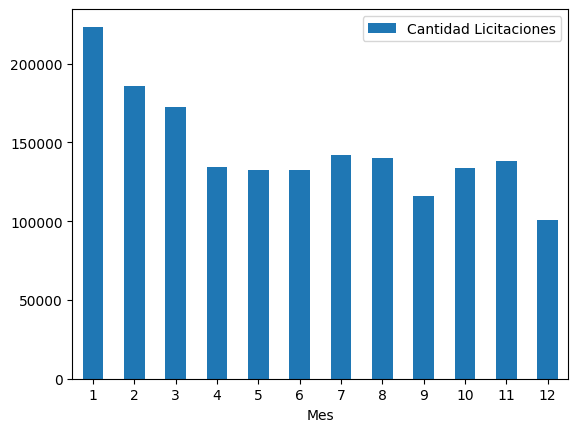

In [4]:
#Licitaciones abiertas por mes
df11 = df[df.Codigo.duplicated(keep=False)]
df11 = df11['FechaPublicacion'].dt.date.value_counts().sort_index().reset_index()
df11.columns=['Fecha Publicacion','Codigo']
df11['Fecha Publicacion']=pd.to_datetime(df11['Fecha Publicacion'])
df11['month'] = df11['Fecha Publicacion'].dt.month
df12 = df11.groupby(df11['Fecha Publicacion'].dt.month)['Codigo'].sum()
df12 = df12.to_frame().reset_index()
df12.columns = ['Mes', 'Cantidad Licitaciones']
ax = df12.plot.bar(x='Mes', y='Cantidad Licitaciones', rot=0)

In [5]:
df13 = df['NombreProveedor'].value_counts().to_frame().reset_index()
df13['NombreProveedor'].sum()

1769860

In [6]:
#Top proveedores que aplicaron a licitación
df13['Porcentaje del total'] = df13['NombreProveedor']/1769860
df13[:15]

,index,NombreProveedor,Porcentaje del total
0,ETHON PHARMACEUTICALS SPA.,56023,0.031654
1,Socofar Division Munnich,46353,0.026190
2,Caribean Pharma Ltda,43473,0.024563
3,Distribuidora Salcobrand,36489,0.020617
4,WINPHARM,34765,0.019643
5,Medikar Ltda,30318,0.017130
6,DROGUERIA GLOBAL PHARMA SPA,29200,0.016498
7,LABOFAR,22592,0.012765
8,COMERCIALIZADORA ILHABELLA EIRL,22505,0.012716
9,LABORATORIO CHILE S.A.,20346,0.011496


In [7]:
df14 = df['NombreOrganismo'].value_counts().to_frame().reset_index()
df14['NombreOrganismo'].sum()

1769860

In [8]:
#Top Organismos ofertantes
df14['Porcentaje del total'] = df14['NombreOrganismo']/1769860
df14[:15]

,index,NombreOrganismo,Porcentaje del total
0,FUERZA AEREA DE CHILE COMANDO LOGISTICO,43210,0.024414
1,MINISTERIO DE OBRAS PUBLICAS DIREC CION GRAL D...,35290,0.019939
2,COMANDO DE APOYO A LA FUERZA,34835,0.019682
3,DIRECCION DE ABASTECIMIENTO DE LA ARMADA,26760,0.015120
4,I MUNICIPALIDAD DE LOTA,24925,0.014083
5,SERVICIO DE SALUD VALDIVIA HOSPITAL BASE,23619,0.013345
6,INSTITUTO DE SALUD PUBLICA DE CHILE,22295,0.012597
7,DIRECCION GENERAL DE GENDARMERIA DE CHIL,20607,0.011643
8,I MUNICIPALIDAD DE LA PINTANA,19980,0.011289
9,I MUNICIPALIDAD VALDIVIA,17312,0.009782


In [9]:
df15 = df['Oferta seleccionada'].value_counts().to_frame().reset_index()
df15

,index,Oferta seleccionada
0,No Seleccionada,1409938
1,Seleccionada,359922


In [10]:
#Top proveedores seleccionados
df15 = df[df['Oferta seleccionada'] == 'Seleccionada']
df15 = df15['NombreProveedor'].value_counts().to_frame().reset_index()
df15['Porcentaje del total'] = df15['NombreProveedor']/359922
df15[:15]


,index,NombreProveedor,Porcentaje del total
0,ETHON PHARMACEUTICALS SPA.,8624,0.023961
1,Caribean Pharma Ltda,7468,0.020749
2,Socofar Division Munnich,6066,0.016854
3,LABORATORIO CHILE S.A.,5974,0.016598
4,LABORATORIOS RECALCINE S.A,4870,0.013531
5,DROGUERIA GLOBAL PHARMA SPA,4756,0.013214
6,VALTEK S.A.,3833,0.010650
7,LABORATORIOS ANDROMACO S.A.,3245,0.009016
8,Distribuidora Salcobrand,3156,0.008769
9,MAYORDENT LTDA,3082,0.008563


In [11]:
df16 = df['Estado'].value_counts().to_frame().reset_index()
df16

,index,Estado
0,Adjudicada,1633154
1,Desierta (o art. 3 ó 9 Ley 19.886),75018
2,Revocada,32108
3,Cerrada,29503
4,Suspendida,77


In [12]:
df16 = df[df['Estado'] == 'Adjudicada']
df16 = df16['NombreProveedor'].value_counts().to_frame().reset_index()
df16['Porcentaje del total'] = df16['NombreProveedor']/1633154
df16[:15]

,index,NombreProveedor,Porcentaje del total
0,ETHON PHARMACEUTICALS SPA.,53671,0.032863
1,Socofar Division Munnich,43958,0.026916
2,Caribean Pharma Ltda,41971,0.025699
3,Distribuidora Salcobrand,35137,0.021515
4,WINPHARM,33047,0.020235
5,Medikar Ltda,29319,0.017952
6,DROGUERIA GLOBAL PHARMA SPA,28048,0.017174
7,LABOFAR,21815,0.013358
8,COMERCIALIZADORA ILHABELLA EIRL,20891,0.012792
9,LABORATORIO CHILE S.A.,19765,0.012102


### 2) Inferencia red:

#### Lista de Nodos de Organismos

In [13]:
lista_organismos = df['NombreOrganismo'].unique()
lista_organismos[0:5]
len(lista_organismos)

859

#### Lista de Nodos de Empresas

In [14]:
lista_empresas = df['NombreProveedor'].unique()
lista_empresas[0:5]
len(lista_empresas)

37765

#### Eliminar Nodos Presentes en Ambos Grupos de Nodos

In [15]:
del_empresas = []
for organismo in lista_organismos:
    for empresa in lista_empresas:
        if organismo == empresa:
            del_empresas.append(organismo)
del_empresas

['UNIVERSIDAD DE MAGALLANES',
 'UNIVERSIDAD DEL BIO BIO',
 'UNIVERSIDAD DE ATACAMA',
 'UNIVERSIDAD DE TALCA',
 'UNIVERSIDAD DE LA FRONTERA',
 'INSTITUTO FORESTAL',
 'INSTITUTO DE FOMENTO PESQUERO']

In [16]:
for universidad in del_empresas:
    df = df[df['NombreProveedor'] != universidad]

In [17]:
lista_empresas = df['NombreProveedor'].unique()
len(lista_empresas)

37758

#### Definición de Enlaces Empresas/Organismos

In [14]:
#df = df[df['ComunaUnidad'] == 'Santiago']  #'''Este código solo se usa para hacer pruebas por motivos de procesamiento'''

In [18]:
pivot = pd.pivot_table(df, index=['NombreOrganismo','NombreProveedor'],values=['Oferta seleccionada'],aggfunc='count')
pivot = pivot.reset_index()
pivot.head()

,NombreOrganismo,NombreProveedor,Oferta seleccionada
0,AGENCIA CHILENA DE COOPERACION INTERNACIONAL P...,ARTL CHILE AUDITORES SPA,1
1,AGENCIA CHILENA DE COOPERACION INTERNACIONAL P...,AdjudicaChile Consultora en Licitaciones Públicas,1
2,AGENCIA CHILENA DE COOPERACION INTERNACIONAL P...,Aiguasol,2
3,AGENCIA CHILENA DE COOPERACION INTERNACIONAL P...,Amelia Virginia,1
4,AGENCIA CHILENA DE COOPERACION INTERNACIONAL P...,Astral S.A.,1


In [19]:
lista_tuplas_pesos = []

for i in pivot.to_numpy():
    lista_tuplas_pesos.append((i[0], i[1], i[2]))

In [20]:
lista_tuplas_pesos[:4]

[('AGENCIA CHILENA DE COOPERACION INTERNACIONAL PARA EL DESARROLLO',
  'ARTL CHILE AUDITORES SPA',
  1),
 ('AGENCIA CHILENA DE COOPERACION INTERNACIONAL PARA EL DESARROLLO',
  'AdjudicaChile Consultora en Licitaciones Públicas',
  1),
 ('AGENCIA CHILENA DE COOPERACION INTERNACIONAL PARA EL DESARROLLO',
  'Aiguasol',
  2),
 ('AGENCIA CHILENA DE COOPERACION INTERNACIONAL PARA EL DESARROLLO',
  'Amelia Virginia',
  1)]

In [22]:
len(lista_tuplas_pesos)

205391

#### Construcción del Grafo

In [23]:
G = nx.Graph()

In [24]:
G.add_nodes_from(lista_empresas, bipartite=0)
G.add_nodes_from(lista_organismos,bipartite=1)

In [25]:
G.add_weighted_edges_from(lista_tuplas_pesos)

In [26]:
bipartite.is_bipartite(G)

True

In [27]:
nx.density(G)

0.00027546446779416127

In [28]:
N1 = len(G)
L1 = G.size()
degrees1 = list(dict(G.degree()).values())
kmin1 = min(degrees1)
kmax1 = max(degrees1)

print("Número de nodos: ", N1)
print("Número de enlaces: ", L1)
print('-------')
print("Grado promedio: ", 2*L1/N1) #Formula vista en clases (qué sucedía con las redes reales?)
print("Grado promedio (alternativa de calculo)", np.mean(degrees1))
print('-------')
print("Grado mínimo: ", kmin1)
print("Grado máximo: ", kmax1)

Número de nodos:  38617
Número de enlaces:  205391
-------
Grado promedio:  10.637335888339333
Grado promedio (alternativa de calculo) 10.637335888339333
-------
Grado mínimo:  1
Grado máximo:  3165


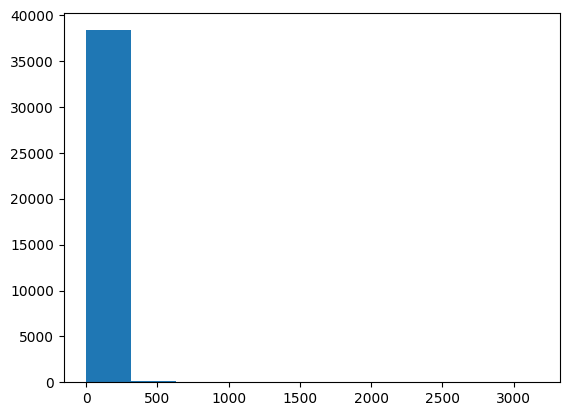

In [33]:
degrees = list(dict(G.degree()).values())
plt.hist(list(degrees))
plt.show()

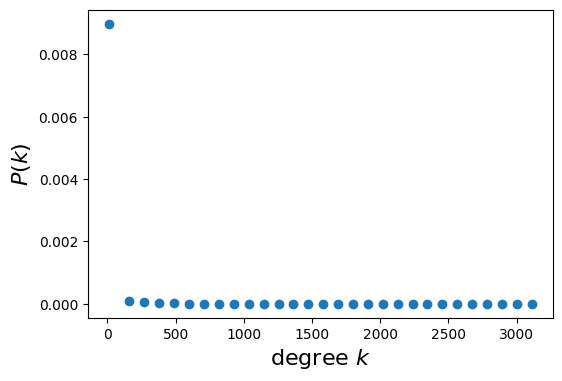

In [31]:
# Entrega 20 bins linealmente espaceados entre kmin y kmax
bin_edges = np.linspace(kmin1, kmax1, num=30)

# histograma de la data en estos bines 
density, _ = np.histogram(degrees1, bins=bin_edges, density=True)
###Histograma
fig = plt.figure(figsize=(6,4))

# "x" debería ser el punto medido (en escala lineal) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# Muestra la gráfica
plt.show()

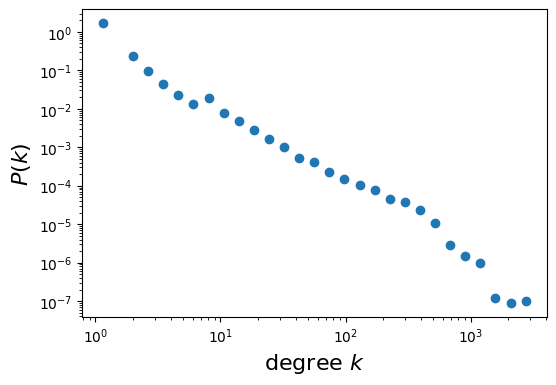

In [32]:
bin_edges = np.logspace(np.log10(kmin1), np.log10(kmax1), num=30)
density, _ = np.histogram(degrees1, bins=bin_edges, density=True)
np.histogram(degrees1, bins=bin_edges, density=True)

###Histograma
fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# Muestra la gráfica
plt.show()

#### Identificacion de Comunidades

In [25]:
import matplotlib.pyplot as plt
from matplotlib import cm

In [26]:
from community import community_louvain

partition = community_louvain.best_partition(G)

size = (len(set(partition.values())))#Numero de comunidades
print('Se detectan %d comunidades' % (size))

Se detectan 16 comunidades


In [27]:
d = {}
for character, par in partition.items():
    if par in d:
        d[par].append(character)
    else:
        d[par] = [character]


In [28]:
for i in range(len(d)):
    print(f'Tamaño Comunidad {i}: {len(d[i])}')

Tamaño Comunidad 0: 3357
Tamaño Comunidad 1: 1585
Tamaño Comunidad 2: 55
Tamaño Comunidad 3: 7230
Tamaño Comunidad 4: 362
Tamaño Comunidad 5: 3975
Tamaño Comunidad 6: 3193
Tamaño Comunidad 7: 594
Tamaño Comunidad 8: 71
Tamaño Comunidad 9: 4715
Tamaño Comunidad 10: 5113
Tamaño Comunidad 11: 8225
Tamaño Comunidad 12: 15
Tamaño Comunidad 13: 118
Tamaño Comunidad 14: 4
Tamaño Comunidad 15: 5


In [29]:
pos = nx.spring_layout(G) # Layout para la red (coordenadas de los nodos y enlaces)

In [30]:
#Posiciones definidas para los nodos
len(pos)

38617

In [31]:
#Verificacion de cantidad de nodos
len(lista_organismos)+len(lista_empresas)

38617

#### Ploteo del Grafo

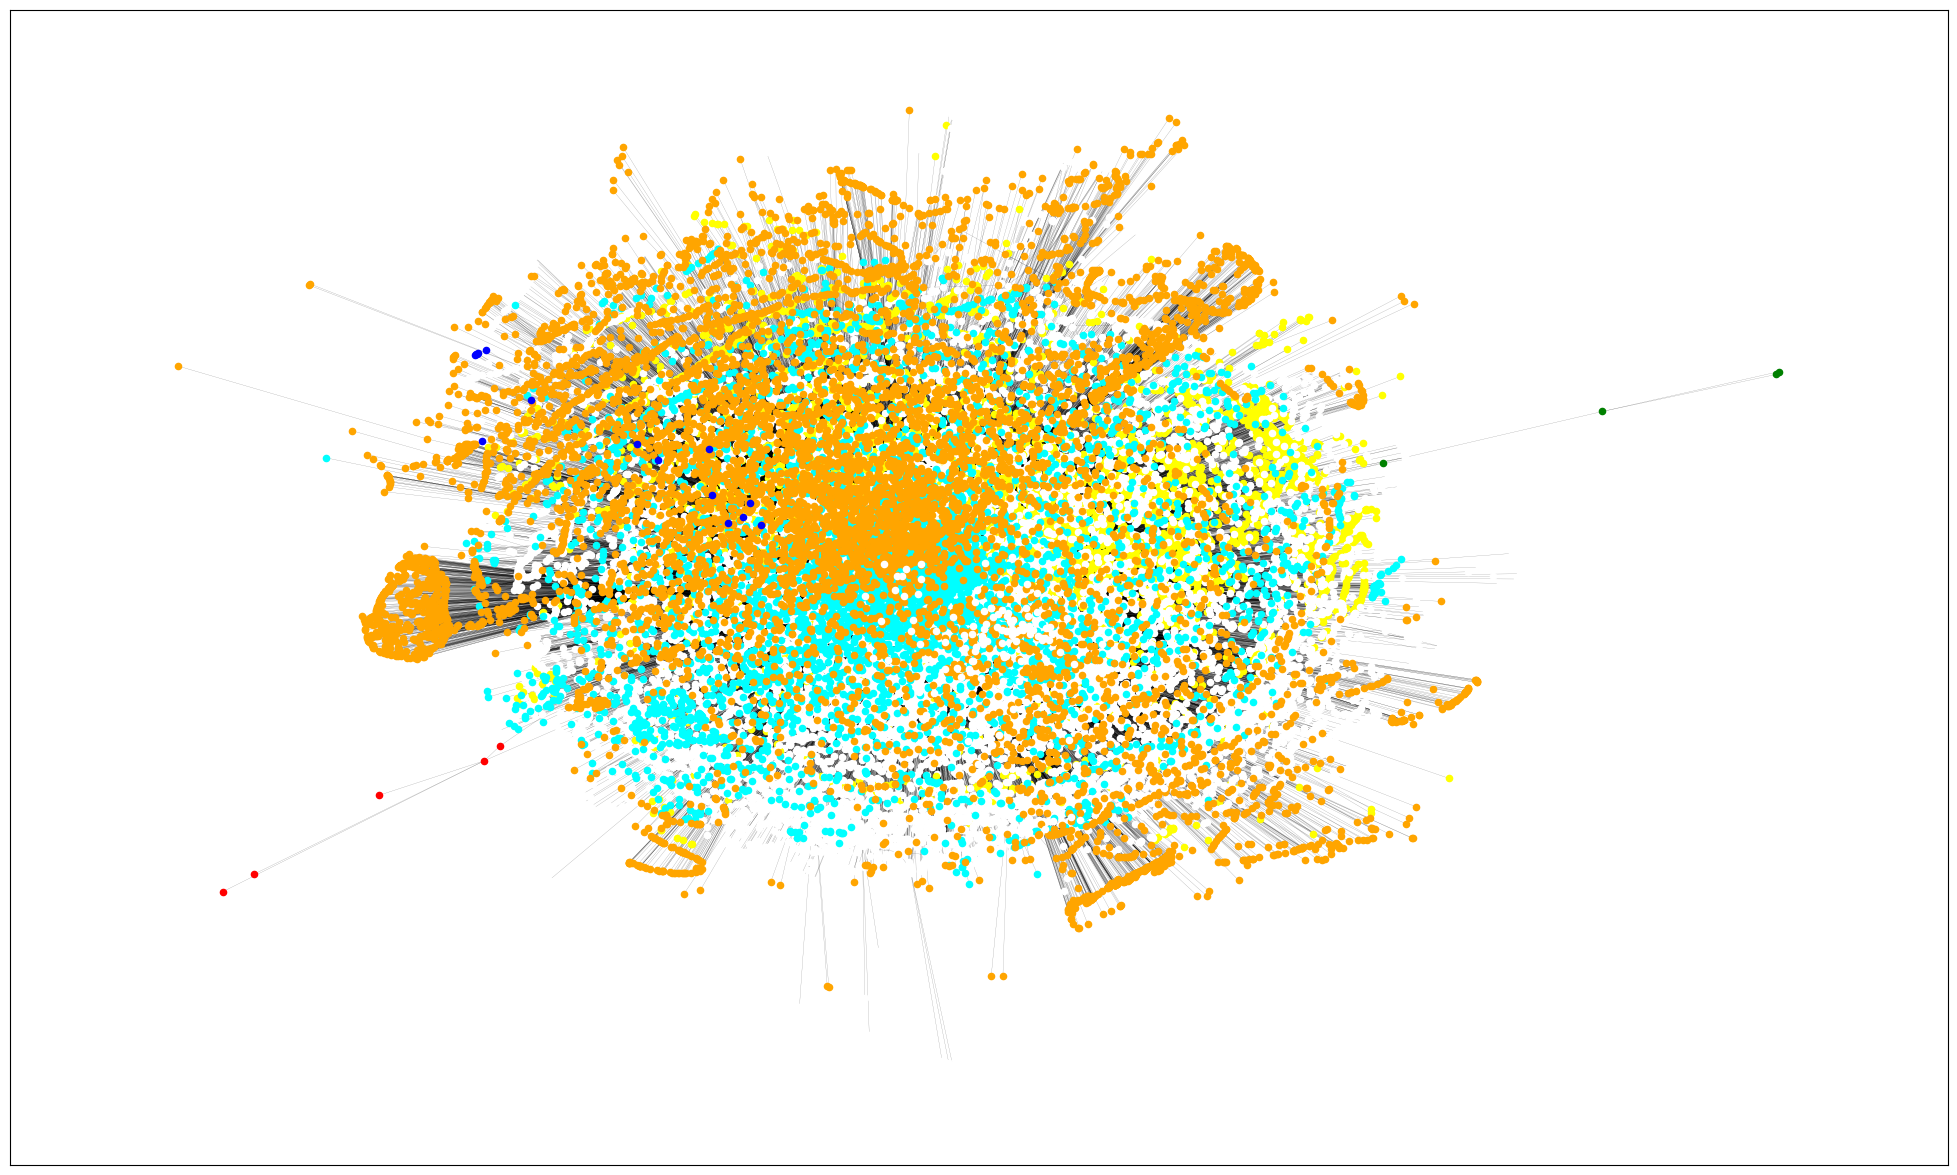

In [63]:
plt.figure(figsize=(25, 15))

#colors = [np.array(cm.jet(x)).reshape(1,-1) for x in np.linspace(0, 1, size)]#cm.jet es el mapa de colores https://www.programcreek.com/python/example/56498/matplotlib.cm.jet
colors = ['white', 'white', 'white', 'yellow', 'white', 'white', 'white', 'white', 'white', 'white', 'cyan', 'orange', 'blue', 'white', 'green', 'red', ]

count = 0
for com in set(partition.values()): #para cada comunidad
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]#guarda los personajes que pertenecen a la comunidad `com`
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color=colors[count])#plotea nodos con colors por comunidad
    count = count + 1# para iterar sobre los colores

nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.15)#plotea enlaces
plt.show()


In [33]:
#Corroborar que la suma de cada nodo separado en als comunidades coincidan con la cantidad de nodos

sum = int()
for i in range(len(d)):
    sum = sum + len(d[i])
print (sum)

38617


In [34]:
d[11]

['MASSER ',
 'JOSE ANTONIO',
 'Guillermo Alfonso ',
 '89847524',
 'SOLANCH MACARENA ',
 'MACLEAN SPA',
 'FIRMA ABOGADOS CHILE',
 'CARROT SUPPORT',
 'Lathrop Consultores',
 'Desarrolla Accion SpA',
 'Eulen Seguridad S.A',
 'Semper-Fi Security Ltda.',
 'HS y Cia Ltda',
 'ICARO SEGURIDAD',
 'federal corp s.a.',
 'Carlos Arratia Rodríguez',
 'MICHELL-HILARION CONSULTORES SPA',
 'pgc ingenieros ltda',
 'jac24ingenieria',
 'Astral S.A.',
 'Transportes CentrOriente',
 'TRANSPORTES QUOVADIS',
 'Plaguisur Ltda',
 'Digital Maker',
 'SSP',
 'Selim Dabed y Cia. Ltda. - Casa Matriz',
 'SEGURIDAD PRIVADA BELFAST LIMITADA',
 'Ingenieria Construcciones y Servicios Yagnam Ltda.',
 'CONSTRUCTORA DEL ARTE SPA',
 'LAVEL LTDA.',
 'Sermagin ltda',
 'Genset Energy Solutions Ltda.',
 'Regeneraxion',
 'BDH Arquitectos Ltda.',
 'ARQUING LTDA.',
 'FERNANDO PONCE ARQUITECTURA E INGENIERIA SPA',
 'EMOJ',
 'D-Heen Arquitectos E.I.R.L',
 'EMach',
 'IDEMIA IDENTITY & SECURITY CHILE',
 'BANCO DE CREDITO E INVERSIONES'

In [35]:
d[10]

['NUCLEO PAISAJISMO S A',
 'FRAY JORGE S.A.',
 'Constructora Javier Vásquez Ltda',
 'EME',
 'nicole ',
 'MATAQUITO LTDA.',
 'CAYCA Consultores Ltda.',
 'FUSION INDUSTRIAL SPA',
 'Horizonte Paisajismo Ltda',
 'Phoenix Paisajismo Ltda.',
 'Viveros Terranova LTDA.',
 'AGROMAIPO',
 'OSM Ltda.',
 'CONVENIO MARCO',
 'Jaime Castillo Brevis',
 'Sociedad Tecnológica y Servicios Express Ltda',
 'marco antonio',
 'COMERCIALIZADORA TICMA',
 'Roian Store',
 'Jorge Antonio',
 'FERNANDO VELOSO OLIVA',
 'CyG Multitaller',
 'mcsa',
 'Chileparcels',
 'SEL SOLUCIONES ESTRATEGICAS',
 'Jean sigifredo',
 'INMOBILIARIA Y CONSTRUCTORA ALMA LTDA',
 'incoseelig',
 'Ricardo Esteban',
 'VIGATEC S.A',
 'ARIEL ALEJANDRO GUTIERREZ LLANOS',
 'Alfombras Winter',
 'Hugo Hernan Cifuentes Diaz',
 'FernandoFolschP',
 'Victoriano Lara Muñoz',
 'Desarrollos Civiles A & A Limitada',
 'ITAHUA',
 'Antonio ',
 'CONSTRUCTORA NUEVO CHAÑAR SA.',
 'Sociedad Comercial Oficinta Ltda.',
 'Salemenergy Ltda.',
 'Constructora NVN Ltda.',

In [66]:
d[15]

['GYP TECNOLOGIA',
 'Conecta Global Ltda.',
 'Zerega Y Cia. Ltda.',
 'Aquapress Limitada',
 'GOBIERNO REGIONAL DE ATACAMA']

In [67]:
for i in range(15,16):
    print(d[10][i])
    print (df[df['NombreProveedor'] == d[10][i]])
       
    

Sociedad Tecnológica y Servicios Express Ltda
          Codigo                      Tipo de Adquisicion  \
1160     8588194  Licitación Pública Menor a 100 UTM (L1)   
11991    8631083  Licitación Pública Menor a 100 UTM (L1)   
17449    8633205  Licitación Pública Menor a 100 UTM (L1)   
17454    8633205  Licitación Pública Menor a 100 UTM (L1)   
17480    8633205  Licitación Pública Menor a 100 UTM (L1)   
...          ...                                      ...   
1807100  8722887  Licitación Pública Menor a 100 UTM (L1)   
1812218  8723363  Licitación Pública Menor a 100 UTM (L1)   
1877159  8734427  Licitación Pública Menor a 100 UTM (L1)   
1877162  8734427  Licitación Pública Menor a 100 UTM (L1)   
1877163  8734427  Licitación Pública Menor a 100 UTM (L1)   

                                     Estado  CodigoOrganismo  \
1160     Desierta (o art. 3 ó 9 Ley 19.886)            96996   
11991                            Adjudicada            99860   
17449                        

In [76]:
def comunidad(book, d):

    j=0
    df1 = pd.DataFrame()
    for name in d:
        for i in range(len(book)):
            if name in book.NombreOrganismo[i]:
                for nameT in d:
                    if nameT in book.NombreProveedor[i]:
                        if j == 0:
                            df1 = book.loc[i:i]
                            j = 1
                        else:
                            df2 = book.loc[i:i]
                            frames = [df1,df2]
                            df1 = pd.concat(frames)
            
    return df1 

In [80]:
def comunidad_grado_cent_mayor (book, d):

    comunity = comunidad(book, d)
    G_comunity = nx.Graph()
    
    for row in comunity.iterrows():
        G_comunity.add_edge(row[1]['NombreOrganismo'], row[1]['NombreProveedor'], weight=row[1]['Oferta seleccionada'])
    data = nx.degree_centrality(G_comunity)
    MG = pd.DataFrame.from_dict(data, orient='index', columns= ['Degree_Centrality']).sort_values('Degree_Centrality',ascending=False).iloc[:1]
    
    return MG

In [ ]:
for i in range (0,16):
    print(f'\n\nComunidad {i}')
    print(comunidad_grado_cent_mayor (pivot, d[i]))



Comunidad 0
                                          Degree_Centrality
SERVICIO DE SALUD VALDIVIA HOSPITAL BASE           0.130739


Comunidad 1
                                Degree_Centrality
SUBSECRETARIA DE SALUD PUBLICA           0.217087


Comunidad 2
                              Degree_Centrality
I MUNICIPALIDAD DE HUALAIHUE           0.388889


Comunidad 3
